<a href="https://colab.research.google.com/github/NourMlaiki/AI_Ovarian/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nour's Data notebook
This notebook will serve as an area where you will clean, format and then find patterns in your dataset.

# Dataset Information
**Source:** https://www.kaggle.com/datasets/saurabhshahane/predict-ovarian-cancer

**Structure:** \\

You will notice there at .xlsx files and .csv files. We will be only using the .csv files.

*Supplementary data 1*:
It contains the original raw data.

*Supplementary data 2*:
It contains a list of biomarkers, their abbreviations, and their descriptions
used in the study.

*Supplementary data 3*:
It contains the imputed version of the training data without the biomarker CA72-4.

*Supplementary data 4*:
It contains the raw training data. (what we will be using for training our Machine Learning algorithms)

*Supplementary data 5*:
It contains the raw test data. (what we will be using for testing our Machine Learning Algorithm)

# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
You will need to change this link as it will be different on your computer. If you go to our shared folder, right click on the backup_ovarian_cancer folder
and
'''
%cd /content/drive/MyDrive/Nour Mlaiki/data/backup_ovarian_cancer

/content/drive/.shortcut-targets-by-id/1D8RoLO-TdYDGe9-8S4-wxPsXOHCmn9J8/Nour Mlaiki/data/backup_ovarian_cancer


In [ ]:
# the 'ls' command lists all of the files in the backup_ovarian_cancer folder
!ls

'Supplementary data 1.xlsx'  'Supplementary data 4.csv'
'Supplementary data 2.xlsx'  'Supplementary data 4.xlsx'
'Supplementary data 3.csv'   'Supplementary data 5.csv'
'Supplementary data 3.xlsx'  'Supplementary data 5.xlsx'


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Prepare Our Data for the Machine Learning Models

In [ ]:
# Reading in our data and converting it to pandas and numpy data
dataset = 'Supplementary data 4.csv'
data_pandas = pd.read_csv(dataset)
data_numpy = data_pandas.to_numpy()
print(data_pandas)

     SUBJECT_ID      AFP     AG  Age   ALB   ALP   ALT   AST  BASO#  BASO%  \
0             1   3.58\t  19.36   47  45.4  56.0  11.0  24.0   0.01   0.30   
1             2  34.24\t  23.98   61  39.9  95.0   9.0  13.0   0.02   0.30   
2             3   1.50\t  18.40   39  45.4  77.0   9.0  18.0   0.03   0.60   
3             4     2.75  16.60   45  39.2  26.0  16.0  17.0   0.05   0.74   
4             5     2.36  19.97   45  35.0  47.0  21.0  27.0   0.01   0.10   
..          ...      ...    ...  ...   ...   ...   ...   ...    ...    ...   
230         231     0.77  20.75   32  34.8  51.0  18.0  19.0   0.02   0.70   
231         232     1.92  20.69   44  43.1  78.0  17.0  24.0   0.07   0.90   
232         233     2.44  22.04   52  43.7  63.0  16.0  13.0   0.05   0.85   
233         234    10.31  17.67   27  43.6  66.0  20.0  16.0   0.07   1.34   
234         235      4.3  21.34   40  35.8  57.0  19.0  10.0   0.01   0.10   

     ...    NEU    PCT   PDW  PHOS  PLT   RBC   RDW  TBIL    TP

In [ ]:
no = 0
yes =0
for i in data_numpy[:,19]:
  if i == 1:
    yes += 1
  else :
    no += 1
print(no)
print(yes)





146
89


In [ ]:
s=0
for i in data_pandas['Age']:
  if i == 61:
    s+=0

print(s)


0


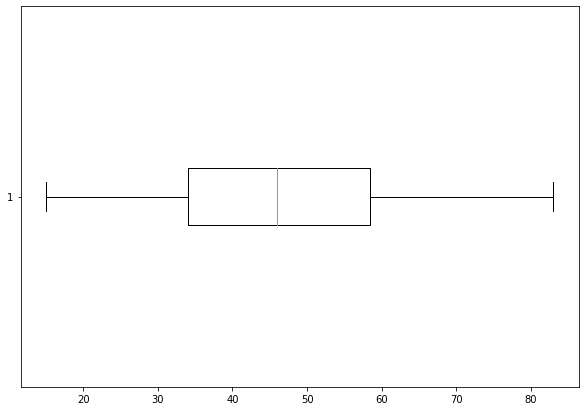

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating datas

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data_pandas['Age'], vert = 0)

# show plot
plt.show()


In [ ]:
dataset_test = 'Supplementary data 5.csv'
data_pandas_test = pd.read_csv(dataset_test)
data_numpy_test = data_pandas_test.to_numpy()

In [ ]:
# Fixing string errors in the data

def format_data(data_pandas, data_numpy):
  AFP_new={}
  new_col = []
  for i in range(data_numpy.shape[0]):
    value=data_numpy[i,1]
    if isinstance(value,str):
      value = value.strip("\t>")

    AFP_new[i]=float(value)
    new_col.append(float(value))

  data_pandas['AFP']= AFP_new.values()
  data_pandas = data_pandas.apply(pd.to_numeric, errors='coerce')
  data_pandas.fillna(data_pandas.mean(numeric_only=True), inplace=True)
  data_numpy = data_pandas.to_numpy()

  return data_pandas, data_numpy

In [ ]:
def get_x_and_y(data_numpy):
  x = np.concatenate((data_numpy[:,1:19], data_numpy[:,20:]), axis=1)
  y = data_numpy[:,19]
  return x, y

In [ ]:
# my_array = [1, 2, 3, 4, 5]
# we want all the number in array to be between 0 and 1
# normalized_array = [0, 0.25, 0.5, 0.75, 1]
# Hint: max and min value in the array. min=1, max=5
# 5/ max = 1
# 1/ max = 0.2
# x_noramlized = (x_old - min)/(max-min)


def normalize_data(x):
  max_els = x.max(0)
  min_els = x.min(0)

  normalized_x = (x - min_els) / (max_els - min_els)   # TODO: Fill in.
  return normalized_x

In [ ]:
def get_x_and_y(data_numpy):
  x = np.concatenate((data_numpy[:,1:19], data_numpy[:,20:]), axis=1)
  y = data_numpy[:,19]
  return x, y

In [ ]:
data_pandas, data_numpy = format_data(data_pandas, data_numpy)
data_pandas_test,data_numpy_test = format_data(data_pandas_test, data_numpy_test)

NameError: ignored

In [ ]:
print(data_pandas_test)

     SUBJECT_ID   AFP     AG  Age   ALB    ALP   ALT   AST  BASO#  BASO%  ...  \
0           301  2.26  23.00   56  35.1  105.0  12.0  20.0   0.04    0.4  ...   
1           302  3.11  12.00   72  44.8  128.0  13.0  24.0   0.00    0.0  ...   
2           303  5.02  17.05   57  41.1   89.0  18.0  22.0   0.01    0.3  ...   
3           304  1.63  16.26   43  35.2   68.0   5.0  13.0   0.00    0.0  ...   
4           305  4.76  12.60   65  40.2   81.0   6.0  14.0   0.04    0.5  ...   
..          ...   ...    ...  ...   ...    ...   ...   ...    ...    ...  ...   
109         410  2.09  20.91   52  48.6   65.0  40.0  30.0   0.00    0.0  ...   
110         411  2.00  12.14   37  46.1   49.0   9.0  20.0   0.00    0.0  ...   
111         412  2.83  19.23   59  45.8   83.0   9.0  16.0   0.02    0.6  ...   
112         413  1.84  27.22   30  47.8   64.0  26.0  22.0   0.03    0.3  ...   
113         414  1.61  13.00   39  44.9   68.0   7.0  13.0   0.01    0.2  ...   

           NEU   PCT   PDW 

In [ ]:
print(data_pandas)

     SUBJECT_ID    AFP     AG  Age   ALB   ALP   ALT   AST  BASO#  BASO%  ...  \
0             1   3.58  19.36   47  45.4  56.0  11.0  24.0   0.01   0.30  ...   
1             2  34.24  23.98   61  39.9  95.0   9.0  13.0   0.02   0.30  ...   
2             3   1.50  18.40   39  45.4  77.0   9.0  18.0   0.03   0.60  ...   
3             4   2.75  16.60   45  39.2  26.0  16.0  17.0   0.05   0.74  ...   
4             5   2.36  19.97   45  35.0  47.0  21.0  27.0   0.01   0.10  ...   
..          ...    ...    ...  ...   ...   ...   ...   ...    ...    ...  ...   
230         231   0.77  20.75   32  34.8  51.0  18.0  19.0   0.02   0.70  ...   
231         232   1.92  20.69   44  43.1  78.0  17.0  24.0   0.07   0.90  ...   
232         233   2.44  22.04   52  43.7  63.0  16.0  13.0   0.05   0.85  ...   
233         234  10.31  17.67   27  43.6  66.0  20.0  16.0   0.07   1.34  ...   
234         235   4.30  21.34   40  35.8  57.0  19.0  10.0   0.01   0.10  ...   

       NEU    PCT   PDW  PH

In [ ]:
x_test, y_test = get_x_and_y(data_numpy_test)
x_train, y_train = get_x_and_y(data_numpy)
# x, x_test, y, y_test= train_test_split(x,y)

In [ ]:
x_train_normalized = normalize_data(x_train)
x_test_normalized = normalize_data(x_test)
print(x_train.shape)
print(x_test.shape)

(235, 49)
(114, 49)


In [ ]:
x = np.concatenate((x_train_normalized, x_test_normalized))
y = np.concatenate((y_train, y_test))

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15)
print("X_train dimension: ", x_train.shape)
print("y_train dimension: ", y_train.shape)
print("X_test dimension: ", x_test.shape)
print("y_test dimension: ", y_test.shape)
print("x dimension", y.shape)

X_train dimension:  (296, 49)
y_train dimension:  (296,)
X_test dimension:  (53, 49)
y_test dimension:  (53,)
x dimension (349,)


# Train Our Machine Learning Models

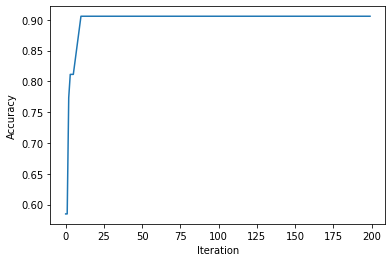

In [ ]:
# NOTE: This will not work without Normalization!

from sklearn.linear_model import LogisticRegression
from numpy import array
import matplotlib.pyplot as plt


acc=array([float()]*200)
for i in range(0,200):
  model = LogisticRegression(max_iter=i)

  model.fit(x_train,y_train)
  prediction = model.predict(x_test)
  score_logreg = accuracy_score(y_test, prediction)
  acc[i]=score_logreg

x = np.arange(0, 200)
plt.plot(x,acc)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.show()

In [ ]:
max=acc[0]
for i in range (1,200):
  if acc[i]>=max:
    max=acc[i]
for i in range(1,200):
  if max==acc[i]:
    a=i

print(max,a)

0.9056603773584906 199


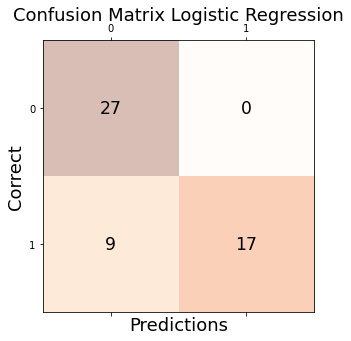

In [ ]:


conf_matrix = confusion_matrix(y_true=y_test, y_pred=prediction_nnet)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Correct', fontsize=18)
plt.title('Confusion Matrix Logistic Regression', fontsize=18)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier


model_tree = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5, min_samples_leaf=10)
model_tree.fit(x_train,y_train)
prediction_tree_gini= model_tree.predict(x_test)


model_tree_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 5, min_samples_leaf = 10)
model_tree_entropy.fit(x_train,y_train)
prediction_tree_entropy= model_tree_entropy.predict(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier


model_forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=10,
                                 random_state=5,
                                 n_jobs=10)
model_forest.fit(x_train,y_train)
prediction_forest= model_forest.predict(x_test)


model_forest_entropy = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 random_state=5,
                                 n_jobs=10)
model_forest_entropy.fit(x_train,y_train)
prediction_forest_entropy= model_forest_entropy.predict(x_test)


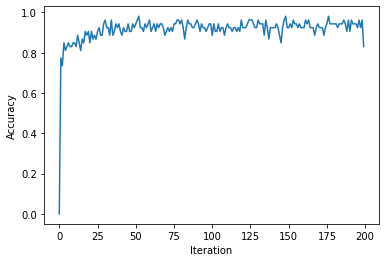

In [ ]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib.pyplot as plt

from numpy import array
acc=array([float()]*200)
prec = array([float()]*200)
f11 = array([float()]*200)
rec = array([float()]*200)
for i in range(1,200):
  nnet = MLPClassifier(hidden_layer_sizes=(250,150,100,80,60,20), learning_rate_init=0.001, solver="adam", max_iter= i)
  nnet.fit(x_train,y_train)
  prediction_nnet = nnet.predict(x_test)
  score_neural = accuracy_score(y_test, prediction_nnet)
  precision_neural = precision_score(y_test,prediction_nnet)
  recall_neural = recall_score(y_test,prediction_nnet)
  f1_score_neural = f1_score(y_test, prediction_nnet)
  acc[i]=score_neural
  prec[i]=precision_neural
  f11[i]=f1_score_neural
  rec[i]=recall_neural



x = np.arange(0, 200)
plt.plot(x,acc)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib.pyplot as plt

nnet2 = MLPClassifier(hidden_layer_sizes=(250,150,100,80,60,20), learning_rate_init=0.001, solver="lbfgs", max_iter= 176)
nnet2.fit(x_train,y_train)
prediction_nnet2 = nnet2.predict(x_test)
score_neural2 = accuracy_score(y_test, prediction_nnet2)
precision_neural2 = precision_score(y_test,prediction_nnet2)
recall_neural2 = recall_score(y_test,prediction_nnet2)
f1_score_neural2 = f1_score(y_test, prediction_nnet2)

print("score neural",score_neural2)
print("precision neural", precision_neural2)
print("recall  neural",recall_neural2)
print("f1 score neural ", f1_score_neural2)

score neural 0.9622641509433962
precision neural 0.9615384615384616
recall  neural 0.9615384615384616
f1 score neural  0.9615384615384616


In [ ]:
nnet3 = MLPClassifier(hidden_layer_sizes=(250,150,100,80,60,20), learning_rate_init=0.001, solver="sgd", max_iter= 176)
nnet3.fit(x_train,y_train)
prediction_nnet3 = nnet3.predict(x_test)
score_neural3 = accuracy_score(y_test, prediction_nnet3)
precision_neural3 = precision_score(y_test,prediction_nnet3)
recall_neural3 = recall_score(y_test,prediction_nnet3)
f1_score_neural3 = f1_score(y_test, prediction_nnet3)



print("score neural",score_neural3)
print("precision neural", precision_neural3)
print("recall  neural",recall_neural3)
print("f1 score neural ", f1_score_neural3)

score neural 0.8490566037735849
precision neural 0.875
recall  neural 0.8076923076923077
f1 score neural  0.8400000000000001


In [ ]:
max=acc[0]
for i in range (1,200):
  if acc[i]>=max:
    max=acc[i]
for i in range(1,200):
  if max==acc[i]:
    a=i

print(max,a)

0.9811320754716981 176


In [ ]:

print("score neural",acc[176])
print("precision neural", prec[176])
print("recall  neural",rec[176])
print("f1 score neural ", f11[176])

score neural 0.9811320754716981
precision neural 1.0
recall  neural 0.9615384615384616
f1 score neural  0.9803921568627451


1. Hyperparameter Tuning \\
  a. Neural Network \\
      i. hidden_layer_sizes (number of layers) (size of each layer) \\
      ii. learning_rate_init=0.001 (0.1, 0.01, 0.001, 0.0001) \\
      iii. solver='adam' (‘lbfgs’, ‘sgd’, ‘adam’) \\
  b. Logreg (max_iters = 1, 2, 3, 4, 5, 10, 15, 50, 100, 200)

##  **PERFOMANCE TESTING**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

1) Testing the logstic regression model


In [ ]:
score_logreg = accuracy_score(y_test, prediction)
precision_logreg = precision_score(y_test,prediction)
recall_logreg = recall_score(y_test,prediction)
f1_score_logreg = f1_score(y_test, prediction)
print("recall", recall_logreg)
print("precision", precision_logreg)
print("score",score_logreg)
print("f1",f1_score_logreg)

recall 0.8461538461538461
precision 0.9565217391304348
score 0.9056603773584906
f1 0.8979591836734695


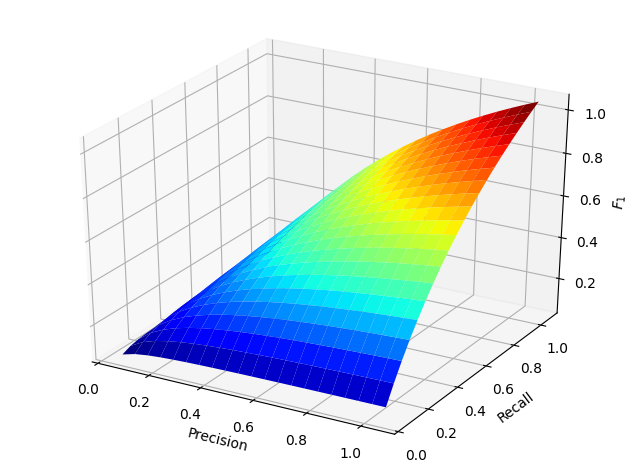

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

def f1_graph(precision, recall):
  return 2 * precision * recall / (precision + recall)

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(projection='3d')
x = y = np.arange(0.05, 1.1, 0.05)
X, Y = np.meshgrid(x, y)
Z = f1_graph(X, Y)

ax.plot_surface(X, Y, Z, cmap=cm.jet)
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_zlabel('$F_1$')
fig.show()

2) Testing the Decision Tree model : gini based

In [ ]:
score_gini = accuracy_score(y_test, prediction_tree_gini)
precision_gini = precision_score(y_test,prediction_tree_gini)
recall_gini = recall_score(y_test,prediction_tree_gini)
f1_score_gini = f1_score(y_test, prediction_tree_gini)
print("score gini",score_gini)
print("precision gini", precision_gini)
print("recall gini",recall_gini)
print("f1 score gini", f1_score_gini)

score gini 0.9056603773584906
precision gini 0.9565217391304348
recall gini 0.8461538461538461
f1 score gini 0.8979591836734695


3) Testing the Decision Tree model : entropy based

In [ ]:
score_entropy=accuracy_score(y_test, prediction_tree_entropy)
precision_entropy = precision_score(y_test,prediction_tree_entropy)
recall_entropy = recall_score(y_test,prediction_tree_entropy)
f1_score_entropy = f1_score(y_test, prediction_tree_entropy)
print("score entropy",score_entropy)
print("precision entropy", precision_entropy)
print("recall entropy",recall_entropy)
print("f1 score entropy", f1_score_entropy)


score entropy 0.9245283018867925
precision entropy 0.9583333333333334
recall entropy 0.8846153846153846
f1 score entropy 0.9199999999999999


4) Testing the Random Forest model : gini based

In [ ]:
score_forest_gini = accuracy_score(y_test, prediction_forest)
precision_forest_gini = precision_score(y_test,prediction_forest)
recall_forest_gini = recall_score(y_test,prediction_forest)
f1_score_forest_g = f1_score(y_test, prediction_forest)
print("score forest gini",score_forest_gini)
print("precision forest gini", precision_forest_gini)
print("recall forest gini",recall_forest_gini)
print("f1 score forest", f1_score_forest_g)

score forest gini 0.8679245283018868
precision forest gini 0.9130434782608695
recall forest gini 0.8076923076923077
f1 score forest 0.8571428571428572


5) Testing the Random Forest model : entropy based

In [ ]:
score_forest_entropy = accuracy_score(y_test, prediction_forest_entropy)
precision_forest_entropy = precision_score(y_test,prediction_forest_entropy)
recall_forest_entropy = recall_score(y_test,prediction_forest_entropy)
f1_score_forest_e = f1_score(y_test, prediction_forest_entropy)
print("score forest entropy",score_forest_entropy)
print("precision forest entropy", precision_forest_entropy)
print("recall forest entropy",recall_forest_entropy)
print("f1 score forest entropy", f1_score_forest_e)

score forest entropy 0.8490566037735849
precision forest entropy 1.0
recall forest entropy 0.6923076923076923
f1 score forest entropy 0.8181818181818181


6) Testing the Neural Networks model

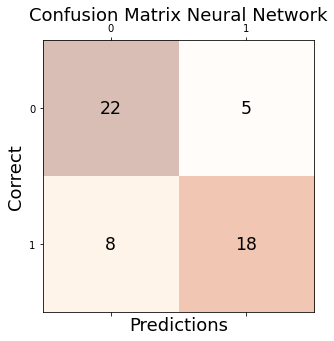

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=prediction_nnet)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Correct', fontsize=18)
plt.title('Confusion Matrix Neural Network', fontsize=18)
plt.show()

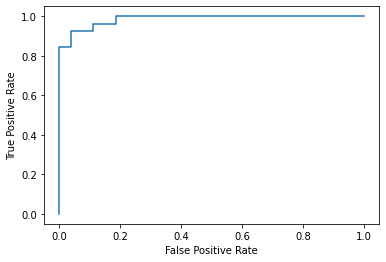

0.9857549857549859


In [ ]:
y_pred_proba = nnet.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(auc(fpr, tpr))

# Comparing performances

In [ ]:
import pandas as pd

precisiondata={'precision':['precision','precision_gini','precision_entropy','precision_forest_gini','precision_forest_entropy','precision_neural'],'Value':[precision_logreg,precision_gini,precision_entropy,precision_forest_gini,precision_forest_entropy,precision_neural]}

scoredata={'score':['score','score_gini','score_entropy','score_forest_gini','score_forest_entropy','score_neural'],'Value':[score_logreg,score_gini,score_entropy,score_forest_gini,score_forest_entropy,score_neural]}

f1data={'f1':['f1_score','f1_score_gini','f1_score_entropy','f1_score_forest_g','f1_score_forest_e','f1_score_neural'],'Value':[f1_score_logreg,f1_score_gini,f1_score_entropy,f1_score_forest_g,f1_score_forest_e,f1_score_neural]}

recalldata={'recall':['recall','recall_gini','recall_entropy','recall_forest_gini','recall_forest_entropy','recall_neural'],'Value':[recall_logreg,recall_gini,recall_entropy,recall_forest_gini,recall_forest_entropy,recall_neural]}

precision_data=pd.DataFrame(precisiondata)
score_data=pd.DataFrame(scoredata)
f1_data=pd.DataFrame(f1data)
recall_data=pd.DataFrame(recalldata)

In [ ]:
print(precisiondata)

{'precision': ['precision', 'precision_gini', 'precision_entropy', 'precision_forest_gini', 'precision_forest_entropy', 'precision_neural'], 'Value': [0.7916666666666666, 0.8387096774193549, 0.8387096774193549, 0.9047619047619048, 0.8, 0.782608695652174]}


In [ ]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


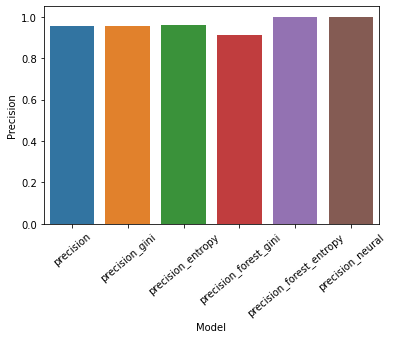

In [ ]:
sns.barplot(precisiondata['precision'], precisiondata['Value'])
plt.xticks(rotation=40)
plt.xlabel('Model')
plt.ylabel('Precision')
# sns.color_palette("rocket", as_cmap=True)
plt.show()

# See if you can get more values on the y axis!


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


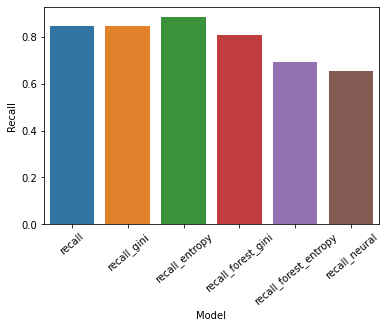

In [ ]:
# sns.histplot(recalldata, x="recall", y="Value")
sns.barplot(recalldata['recall'], recalldata['Value'])
plt.xticks(rotation=40)
plt.xlabel('Model')
plt.ylabel('Recall')
# sns.color_palette("rocket", as_cmap=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


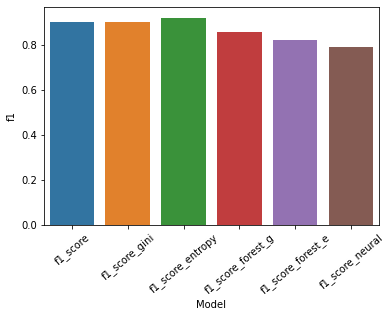

In [ ]:
# sns.histplot(f1data, x="f1", y="Value")
# sns.histplot(recalldata, x="recall", y="Value")
sns.barplot(f1data['f1'], f1data['Value'])
plt.xticks(rotation=40)
plt.xlabel('Model')
plt.ylabel('f1')
# sns.color_palette("rocket", as_cmap=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


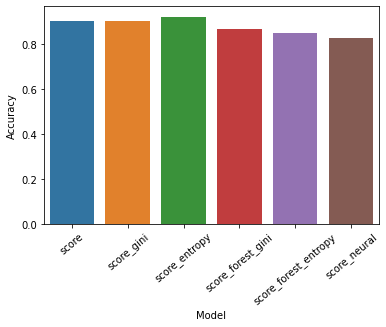

In [ ]:
# sns.histplot(scoredata, x="score", y="Value")
sns.barplot(scoredata['score'], scoredata['Value'])
plt.xticks(rotation=40)
plt.xlabel('Model')
plt.ylabel('Accuracy')
# sns.color_palette("rocket", as_cmap=True)
plt.show()

# Tasks

1. Complete the Normalization function ⭐️
2. Load in the test data ⭐️
3. Rerun with test data ⭐️
4. Metrics Reporting ⭐️
5. Find how many positive and negative examples are in both the train and test 👨‍💻 \\
  a. Visualize these metrics with histograms.

# Homework

2. Hyperparameter Tuning \\
  a. Neural Network \\
      i. hidden_layer_sizes
  b. Logreg (max_iters = 1, 2, 3, 4, 5, 10, 15, 50, 100, 200)
3. Start writing the paper!! \\
  a. https://github.com/oscarfco
